# Example 3. Generate PLA hypotheses by shuffleing data
------
### Import basic needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Perceptron_online import Perceptron_online
from plot_decision_regions import * 

---
### Greate generating-hypotheses class 

In [2]:
class GenHypothesis_PLA(object):
    
        def __init__(self, dataframe, idx_X, idx_y):
            self.df = dataframe
            self.iX = idx_X
            self.iy = idx_y
        
        def genHyps(self, n_hyps=1, eta=0.1, max_iter=1):
            # Initialize variables
            self.pla = []
            self.c0 = [] # c0 = -*w0/w2
            self.c1 = [] # c1 = -*w1/w2
            self.n_hyps = int(abs(n_hyps))
            print 'Generating %d PLA hyp. ....'%(self.n_hyps)
            
            for i in range(self.n_hyps):
                # print i
                # Copy & Shuffle dataframe
                np.random.seed(i)
                df = self.df.reindex(np.random.permutation(self.df.index))
                y = df.iloc[:, self.iy].values
                X = df.iloc[:, self.iX].values
                idx = df.index.values
 
                # Run PLA
                pla = Perceptron_online(eta=eta)
                pla.fit(X, y, max_iter=max_iter)
                self.c0.append(-1*pla.w_[0]/pla.w_[2])
                self.c1.append(-1*pla.w_[1]/pla.w_[2])
                self.pla.append(pla)
                
                if i is 0 :
                    self.X = X
                    self.y = y
            print 'Done'
            return

        # Aggregation of hypotheses
        def predict(self, X=None):
            if X is None: X = self.X 
            # Linear sum
            predict = self.pla[0].predict(X)
            for i in range(1, self.n_hyps):
                predict += self.pla[i].predict(X)    

            #self.predict = np.where(predict >= 0.0, 1, -1)
            #print predict
            #print self.predict
            return np.where(predict >= 0.0, 1, -1)
            

### Input data and generate PLA hypotheses

In [3]:
df = pd.read_csv('iris.data', header=None)[:100] # Keep data from 0-99
df.columns = ['sepal_length', 'x_1', 'petal_length', 'x_3', 'type']
df.iloc[48:52]

,sepal_length,x_1,petal_length,x_3,type
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [4]:
df.loc[df['type'] == 'Iris-setosa', 'type'] = -1
df.loc[df['type'] == 'Iris-versicolor', 'type'] = 1
df.iloc[48:52]

,sepal_length,x_1,petal_length,x_3,type
48,5.3,3.7,1.5,0.2,-1
49,5.0,3.3,1.4,0.2,-1
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1


### Generate many hypotheses

In [5]:
n_hyps=200
max_iter=10
hyps_PLA = GenHypothesis_PLA(dataframe=df, idx_X=[0,2], idx_y=4)
hyps_PLA.genHyps(n_hyps=n_hyps, eta=0.1, max_iter=max_iter)

Generating 200 PLA hyp. ....
Done


In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(hyps_PLA.X[ hyps_PLA.y == 1, 0], hyps_PLA.X[ hyps_PLA.y == 1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(hyps_PLA.X[ hyps_PLA.y ==-1, 0], hyps_PLA.X[ hyps_PLA.y ==-1, 1], color='red',  marker='o', label='setosa')
plt.xlabel('petal length', fontsize=18)
plt.ylabel('sepal length', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.xlim(0., 8.)
plt.ylim(0., 6.)
#plt.show()

(0.0, 6.0)

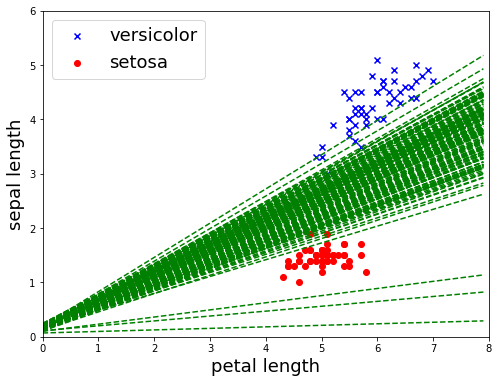

In [7]:
x = np.arange(0., 8., 0.1)

for i in range(n_hyps):
    plt.plot(x, hyps_PLA.c0[i]+hyps_PLA.c1[i]*x, 'g--')

plt.show()

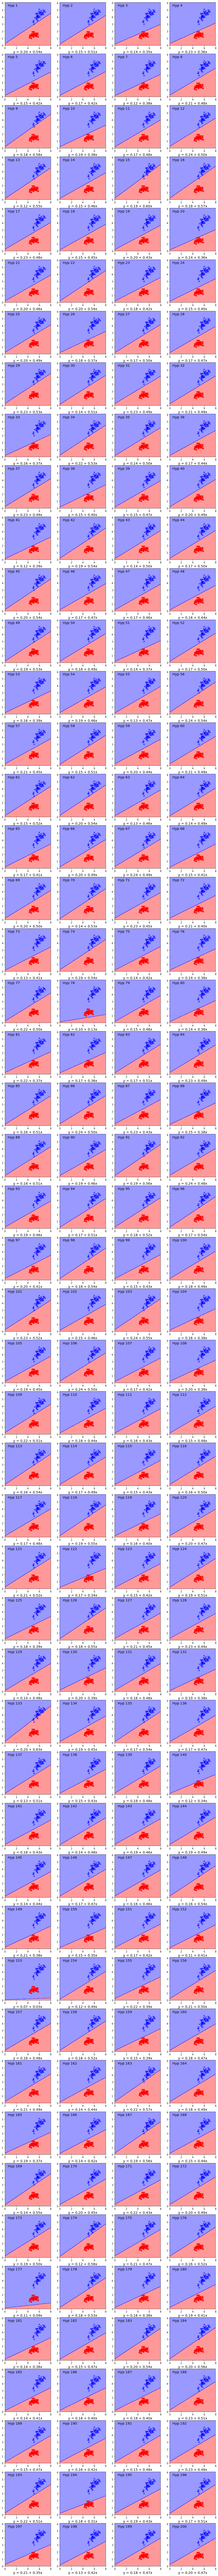

In [8]:
cplot=4
fig = plt.figure(figsize=(16, n_hyps))
for i in range(n_hyps):
    fig.add_subplot(n_hyps/cplot, cplot, i+1)
    plot_decision_regions(hyps_PLA.X, hyps_PLA.y, classifier=hyps_PLA.pla[i], resolution=0.01)
    plt.xlabel('y = %.2f + %.2fx'%(hyps_PLA.c0[i], hyps_PLA.c1[i]), fontsize='x-large' )
    plt.text(0.5, 5.5, 'Hyp '+str(i+1), fontsize='x-large')
#plt.tight_layout()
plt.show()

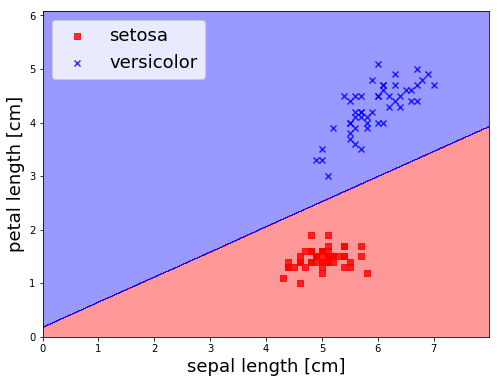

In [9]:
#hyps_PLA.predict()
plt.figure(figsize=(8, 6))
plot_decision_regions(hyps_PLA.X, hyps_PLA.y, classifier=hyps_PLA, resolution=0.01)
plt.xlabel('sepal length [cm]', fontsize=18)
plt.ylabel('petal length [cm]', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.show()
#print hyps_PLA.pla[i].w_